## Random Forest

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Loading Data
data = pd.read_csv("final_validated_data.csv")
data.head()

,Unnamed: 0,RowID,maxsal,minsal,intern_num,month_num,day,industry,city,scale,...,招聘,媒体,内容,专员,产品,销售,开发,工程师,助理,运营
0,0,0,100,50,62,3,5,互联网/游戏/软件,北京,2000人以上,...,0,1,0,0,0,0,0,0,0,0
1,1,1,150,100,5,4,5,教育/培训,深圳,15-50人,...,0,0,0,0,0,0,0,0,0,0
2,2,2,300,250,8,4,5,互联网/游戏/软件,上海,15-50人,...,0,0,0,0,0,0,0,0,0,0
3,3,3,100,100,3,4,4,教育/培训,上海,15-50人,...,0,0,0,0,0,0,0,0,0,0
4,4,4,150,100,176,3,4,互联网/游戏/软件,广州,2000人以上,...,0,0,0,0,1,0,0,0,0,1


### Cleaning Data and Labeling

(array([1180.,    0.,    0., 1622.,    0.,    0., 1170.,    0.,    0.,
        1026.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

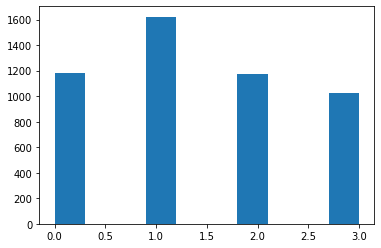

In [3]:

IT_df = data.drop(['Unnamed: 0', 'RowID', 'maxsal', 'minsal','industry', 'city', 'scale', 'name', 'uuid', 'c_desc', 'c_tag','c_name'],axis=1)

# #确定 X和 y

X = IT_df

# Label the max salary (4 classes)
label = []
max_sal = data["maxsal"].to_numpy()
for i in max_sal:

    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
plt.hist(y)

### Scaling and Spliting

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm

# Divide into train, validate, and test set
# X_final_test and y_final_test are our test set, we will not touch it 
# X_test and y_test are out validation set. 

X_train, X_final_test, y_train, y_final_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle = True, random_state=123)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_final_test_scaled = scaler.transform(X_final_test) 


In [5]:
# Baseline
print(1622/len(y))

0.32452981192476993


### Running Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 30,  max_leaf_nodes = 1000, min_samples_split = 2, min_samples_leaf = 10)

model.fit(X_train_scaled,y_train)

train_acc = accuracy_score(model.predict(X_train_scaled),y_train)
test_acc = accuracy_score(model.predict(X_test_scaled),y_test)

print(train_acc)
print(test_acc)

0.5264035575319622
0.4677777777777778


### Grid Search and Cross Validation

In [11]:
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

parameters = {

    'max_leaf_nodes': [x for x in [400,600,800,1000,1200,1400]],
    'max_depth': [x for x in [30]],
    'min_samples_split' : [2],
    'min_samples_leaf' : [10],
    'n_estimators' : [10,20,40,60,80,100]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid = parameters, scoring = 'accuracy', cv=5, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)

{'max_depth': 30, 'max_leaf_nodes': 1400, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 40}


In [33]:
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

parameters = {

    'max_leaf_nodes': [x for x in [600,800,1000,1200,1400,1600]],
    'n_estimators' : [10,20,40,60,80,100],
    'max_depth': [x for x in [5,10,20,30,40,50]],
    'min_samples_leaf' : [2,5,10,20,50]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid = parameters, scoring = 'accuracy', cv=5, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)

{'max_depth': 40, 'max_leaf_nodes': 600, 'min_samples_leaf': 2, 'n_estimators': 60}


### Validation

In [31]:
model = RandomForestClassifier(max_depth = 30,  max_leaf_nodes = 1400, min_samples_split = 2, 
                               min_samples_leaf = 10,
                               n_estimators = 40)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print(accuracy_score(y_pred,y_train))
print(accuracy_score(y_pred_test,y_test))

0.5138966092273485
0.4666666666666667


In [32]:
y_p = model.predict(X_final_test_scaled)
print(accuracy_score(y_p,y_final_test))

0.46
